In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#Return Code:
#0 - Run Successful, flat space, M = 0
#1 - Run Successful, black hole formation, M = Misner Sharp
#-1 - Naked Elliptic Region, M = -1
#-2 - Nan , M = -2
#-3 - Problem with run, M = -3

#Data Record:
# [l, A, M, return code]


path_to_dir = "./Shift-Symmetric-Theory/"

path_names = [ f.path for f in os.scandir(path_to_dir) if f.is_dir() ]

dir_names = []
for p in path_names:
    for f in os.scandir(p):
        if f.is_dir():
            dir_names.append(f.path)
            

# dir_names = [x[0] for x in os.walk(path_to_dir)][1:]

output_files = []
sim_params = []

for name in dir_names:
    output_files.append(name+"/output.out")
    sim_params.append(name+"/sim_params.txt")

record_data = []

for j in range(len(sim_params)):
    l = 0
    A = 0
    with open(sim_params[j]) as f:
        for line in f:
            if line.startswith("l"):
                l = float(line[2:])
            elif line.startswith("A"):
                A = float(line[2:])
            else:
                pass
        record_data.append([l,A])

for j in range(len(sim_params)):
    with open(output_files[j]) as f:
        for line in f:
            pass
        last_line = line
        if last_line.startswith("exit_code_0"):
            record_data[j].extend([0,0])
        elif last_line.startswith("exit_code_1"):
            end_index = last_line.index(",", 38,len(last_line))
            record_data[j].extend([float(last_line[38:end_index-1]),1])
        elif last_line.startswith("naked"):
            record_data[j].extend([-1,-1])
        elif last_line.startswith("NaN("):
            record_data[j].extend([-2,-2])
        else:
#             print("Some problem with run.\nFile name = ",output_files[j])
#             print("Last line reads,\n", last_line)
            record_data[j].append([-3,-3])

record_data= np.array(record_data)

l_vals = np.unique(record_data[:,0])
A_vals = np.unique(record_data[:,1])

def get_arr(j):
    arr = []
    for x in record_data:
        if x[0] == l_vals[j]:
            arr.append(x)
    arr = np.array(arr)
    return arr

class plot_result:
    def __init__(self):
        pass
    #===================================================================        
    def colorfunc(self,mass_index):
        cs = []
        for j in range(len(mass_index)):
            if mass_index[j] ==0:
                cs.append("blue")
            elif mass_index[j]==1:
                cs.append("black")
            elif mass_index[j]==-1:
                cs.append("yellow")
            elif mass_index[j] == -2:
                cs.append("green")
            elif mass_index[j] == -3:
                cs.append("red")
        return cs
#===================================================================
    def plot_final_state(self,record_data):
        x = record_data[:,1]
        y = record_data[:,3]
        c = self.colorfunc(record_data[:,3])
        plt.scatter(x,y,marker='o',c = c)
        plt.xlabel("$A_{initial}$")
        plt.ylabel("Final State")

        blue_patch = mpatches.Patch(color='blue', label='FS')
        black_patch = mpatches.Patch(color='black', label='BH')
        yellow_patch = mpatches.Patch(color='yellow', label='Naked ellitpic')
        green_patch = mpatches.Patch(color='green', label='Nan')
        red_patch = mpatches.Patch(color='red', label='Bad run')

        plt.legend(handles=[blue_patch,black_patch,yellow_patch, green_patch, red_patch])
        plt.title("\"Phase Space\" at $\ell = {}$".format(record_data[0][0]))

#===================================================================
    def plot_mass_state(self,record_data):
        x = record_data[:,1]
        y = record_data[:,2]
        c = self.colorfunc(record_data[:,3])
        plt.scatter(x,y,marker='o',c = c)
        plt.xlabel("$A_{initial}$")
        plt.ylabel("Final Mass")

        blue_patch = mpatches.Patch(color='blue', label='FS')
        black_patch = mpatches.Patch(color='black', label='BH')
        yellow_patch = mpatches.Patch(color='yellow', label='Naked ellitpic')
        green_patch = mpatches.Patch(color='green', label='Nan')
        red_patch = mpatches.Patch(color='red', label='Bad run')

        plt.legend(handles=[blue_patch,black_patch,yellow_patch, green_patch, red_patch])
        plt.title("\"Phase Space\" at $\ell = {}$".format(record_data[0][0]))
    
#======================================================================
    def print_out_amps(self,record_data,val=None):
        
        if val ==None:
            for x in record_data:
                print(x[1])
        else:
            for x in record_data:
                if x[3] == val:
                    print(x[1])

In [2]:
l_vals

array([0.05, 0.1 , 1.  ])

In [3]:
plots = plot_result()

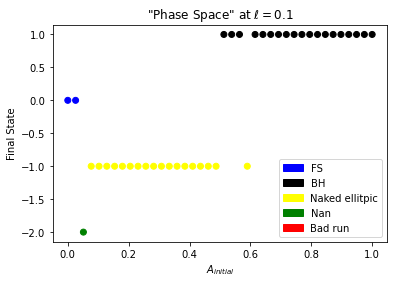

In [4]:
plots.plot_final_state(get_arr(1))

In [7]:
for j in range(len(output_files)):
    if record_data[j][0] == 0.1:
        print(output_files[j])

./Shift-Symmetric-Theory/Run_nx_6000_nt_8000_Mon_Jul_4_13_32/Mon_Jul_4_13_32_57_A_2.05e-01_l_1.00e-01/output.out
./Shift-Symmetric-Theory/Run_nx_6000_nt_8000_Mon_Jul_4_13_32/Mon_Jul_4_13_32_57_A_3.85e-01_l_1.00e-01/output.out
./Shift-Symmetric-Theory/Run_nx_6000_nt_8000_Mon_Jul_4_13_32/Mon_Jul_4_13_32_57_A_5.13e-01_l_1.00e-01/output.out
./Shift-Symmetric-Theory/Run_nx_6000_nt_8000_Mon_Jul_4_13_32/Mon_Jul_4_13_32_57_A_4.87e-01_l_1.00e-01/output.out
./Shift-Symmetric-Theory/Run_nx_6000_nt_8000_Mon_Jul_4_13_32/Mon_Jul_4_13_32_57_A_1.80e-01_l_1.00e-01/output.out
./Shift-Symmetric-Theory/Run_nx_6000_nt_8000_Mon_Jul_4_13_32/Mon_Jul_4_13_32_57_A_5.64e-01_l_1.00e-01/output.out
./Shift-Symmetric-Theory/Run_nx_6000_nt_8000_Mon_Jul_4_13_32/Mon_Jul_4_13_32_57_A_2.82e-01_l_1.00e-01/output.out
./Shift-Symmetric-Theory/Run_nx_6000_nt_8000_Mon_Jul_4_13_32/Mon_Jul_4_13_32_57_A_4.62e-01_l_1.00e-01/output.out
./Shift-Symmetric-Theory/Run_nx_6000_nt_8000_Mon_Jul_4_13_32/Mon_Jul_4_13_32_58_A_8.72e-01_l_1.0

In [5]:
plots.print_out_amps(get_arr(1),-1)

0.20520769230769229
0.384676923076923
0.4872307692307692
0.17956923076923076
0.2821230769230769
0.46159230769230764
0.10265384615384615
0.3077615384615384
0.4103153846153846
0.5897846153846154
0.35903846153846153
0.43595384615384614
0.07701538461538461
0.3334
0.1539307692307692
0.25648461538461537
0.12829230769230768
0.2308461538461538


In [43]:
for j in range(len(record_data)):
    if (record_data[j][0] == 0.05) and (record_data[j][3] == 1):
        with open(output_files[j]) as f:
            for line in f:
                print(line)
    

Saving file at : ./output/Phase-Space/Shift-Symmetric-Theory/Run_nx_7000_nt_8000_Mon_Jul_4_13_33/Mon_Jul_4_13_33_42_A_6.56e-02_l_5.00e-02

nx = 7000

nt = 8000

t_save_steps = 100

dx = 0.0142857

dt = 0.00285714

GB coupling l = 0.05

Scalar Field Amplitude = 0.0655517

ru = 12

rl = 8

Starting simulation...

Found apparent horizon at i = 409 , r = 3.10272 , t = 10.1314

Previous excision point at i = 0 , r = 0.00178578

Updating excision point to i = 136, r = 0.990676

done.

Final time = 22.8571

exit_code_1, BH_Formation , MS_mass = 1.627, run finished successfully.

Saving file at : ./output/Phase-Space/Shift-Symmetric-Theory/Run_nx_7000_nt_8000_Mon_Jul_4_13_33/Mon_Jul_4_13_33_42_A_8.28e-02_l_5.00e-02

nx = 7000

nt = 8000

t_save_steps = 100

dx = 0.0142857

dt = 0.00285714

GB coupling l = 0.05

Scalar Field Amplitude = 0.0827759

ru = 12

rl = 8

Starting simulation...

Found apparent horizon at i = 266 , r = 1.97505 , t = 8.40571

Previous excision point at i = 0 , r = 0.0017

In [24]:
class Data_single_l:
    def __init__(self,path,name,l):
        self.path_to_dir = path
        self.name = name
        self.coupling = l
        dir_names = [ f.path for f in os.scandir(self.path_to_dir) if f.is_dir() ]
        self.dir_names = sorted(dir_names)
        output_files = []
        sim_params = []

        for name in self.dir_names:
            output_files.append(name+"/output.out")
            sim_params.append(name+"/sim_params.txt")
#=======================================================================================
        self.output_files = output_files
        self.sim_params = sim_params
#=======================================================================================
        record_data = []

        for j in range(len(sim_params)):
            l = 0
            A = 0
            with open(sim_params[j]) as f:
                for line in f:
                    if line.startswith("l"):
                        l = float(line[2:])
                    elif line.startswith("A"):
                        A = float(line[2:])
                    else:
                        pass
                record_data.append([l,A])

        for j in range(len(sim_params)):
            with open(output_files[j]) as f:
                for line in f:
                    pass
                last_line = line
                if last_line.startswith("exit_code_0"):
                    record_data[j].extend([0,0])
                elif last_line.startswith("exit_code_1"):
                    record_data[j].extend([float(last_line[38:43]),1])
                elif last_line.startswith("naked"):
                    record_data[j].extend([-1,-1])
                elif last_line.startswith("NaN("):
                    record_data[j].extend([-2,-2])
                else:
        #             print("Some problem with run.\nFile name = ",output_files[j])
        #             print("Last line reads,\n", last_line)
                    record_data[j].append([-3,-3])
        
        self.record_data = np.array(record_data)
    
            
#===================================================================        
    def colorfunc(self,mass_index):
        cs = []
        for j in range(len(mass_index)):
            if mass_index[j] ==0:
                cs.append("blue")
            elif mass_index[j]==1:
                cs.append("black")
            elif mass_index[j]==-1:
                cs.append("yellow")
            elif mass_index[j] == -2:
                cs.append("green")
            elif mass_index[j] == -3:
                cs.append("red")
        return cs
#===================================================================
    def plot_final_state(self):
        x = self.record_data[:,1]
        y = self.record_data[:,3]
        c = self.colorfunc(self.record_data[:,3])
        plt.scatter(x,y,marker='o',c = c)
        plt.xlabel("$A_{initial}$")
        plt.ylabel("Final State")

        blue_patch = mpatches.Patch(color='blue', label='FS')
        black_patch = mpatches.Patch(color='black', label='BH')
        yellow_patch = mpatches.Patch(color='yellow', label='Naked ellitpic')
        green_patch = mpatches.Patch(color='green', label='Nan')
        red_patch = mpatches.Patch(color='red', label='Bad run')

        plt.legend(handles=[blue_patch,black_patch,yellow_patch, green_patch, red_patch])
        plt.title("\"Phase Space\" at $\ell = {}$ of {}".format(self.coupling,self.name))

#===================================================================
    def plot_mass_state(self):
        x = self.record_data[:,1]
        y = self.record_data[:,2]
        c = self.colorfunc(self.record_data[:,3])
        plt.scatter(x,y,marker='o',c = c)
        plt.xlabel("$A_{initial}$")
        plt.ylabel("Final Mass")

        blue_patch = mpatches.Patch(color='blue', label='FS')
        black_patch = mpatches.Patch(color='black', label='BH')
        yellow_patch = mpatches.Patch(color='yellow', label='Naked ellitpic')
        green_patch = mpatches.Patch(color='green', label='Nan')
        red_patch = mpatches.Patch(color='red', label='Bad run')

        plt.legend(handles=[blue_patch,black_patch,yellow_patch, green_patch, red_patch])
        plt.title("\"Phase Space\" at $\ell = {}$ of {} theory".format(self.coupling,self.name))
    
#======================================================================
    def print_out(self,j):
        with open(self.output_files[j]) as f:
                for line in f:
                    print(line)

In [26]:
path_shift_symm = "/Users/abhi/Work/Projects/Hyperbolitcity-Gravitational-Collapse/code-f-phi/output/Phase-Space/Shift-Symmetric-Theory/"
d_shift_symm = Data_single_l(path_shift_symm,"shift symm", 0.5)

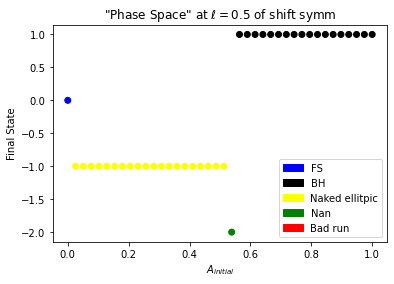

In [27]:
d_shift_symm.plot_final_state()

In [28]:
path_phi_sq = "/Users/abhi/Work/Projects/Hyperbolitcity-Gravitational-Collapse/code-f-phi/output/Phase-Space/Phi-Squared-Theory/"
data_phi_sq = Data_single_l(path_phi_sq,"phi sq", 0.5)

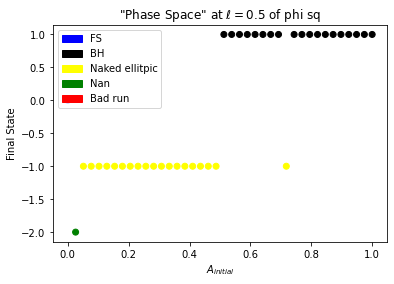

In [29]:
data_phi_sq.plot_final_state()

In [ ]:
# # path_to_dir = "/Users/abhi/Work/Projects/Hyperbolitcity-Gravitational-Collapse/code-f-phi/output/Phase-Space/Shift-Symmetric-Theory/"
# path_to_dir = "/Users/abhi/Work/Projects/Hyperbolitcity-Gravitational-Collapse/code-f-phi/output/Phase-Space/Shift-Symmetric-Theory/"

# dir_names = [ f.path for f in os.scandir(path_to_dir) if f.is_dir() ]

# # dir_names = [x[0] for x in os.walk(path_to_dir)][1:]

# output_files = []
# sim_params = []

# for name in dir_names:
#     output_files.append(name+"/output.out")
#     sim_params.append(name+"/sim_params.txt")

# record_data = []

# for j in range(len(sim_params)):
#     l = 0
#     A = 0
#     with open(sim_params[j]) as f:
#         for line in f:
#             if line.startswith("l"):
#                 l = float(line[2:])
#             elif line.startswith("A"):
#                 A = float(line[2:])
#             else:
#                 pass
#         record_data.append([l,A])

# for j in range(len(sim_params)):
#     with open(output_files[j]) as f:
#         for line in f:
#             pass
#         last_line = line
#         if last_line.startswith("exit_code_0"):
#             record_data[j].extend([0,0])
#         elif last_line.startswith("exit_code_1"):
#             record_data[j].extend([float(last_line[38:43]),1])
#         elif last_line.startswith("naked"):
#             record_data[j].extend([-1,-1])
#         elif last_line.startswith("NaN("):
#             record_data[j].extend([-2,-2])
#         else:
# #             print("Some problem with run.\nFile name = ",output_files[j])
# #             print("Last line reads,\n", last_line)
#             record_data[j].append([-3,-3])

# record_data = np.array(record_data)

# def colorfunc(mass_index):
#     cs = []
#     for j in range(len(mass_index)):
#         if mass_index[j] ==0:
#             cs.append("blue")
#         elif mass_index[j]==1:
#             cs.append("black")
#         elif mass_index[j]==-1:
#             cs.append("yellow")
#         elif mass_index[j] == -2:
#             cs.append("green")
#         elif mass_index[j] == -3:
#             cs.append("red")
#     return cs
    

# x = record_data[:,1]
# y = record_data[:,2]
# c = colorfunc(record_data[:,3])
# plt.scatter(x,y,marker='o',c = c)
# plt.xlabel("$A$")
# plt.ylabel("$M$")

# blue_patch = mpatches.Patch(color='blue', label='FS')
# black_patch = mpatches.Patch(color='black', label='BH')
# yellow_patch = mpatches.Patch(color='yellow', label='Naked ellitpic')
# green_patch = mpatches.Patch(color='green', label='Nan')
# red_patch = mpatches.Patch(color='red', label='Bad run')

# plt.legend(handles=[blue_patch,black_patch,yellow_patch, green_patch, red_patch])

# x = record_data[:,1]
# y = record_data[:,3]
# c = colorfunc(record_data[:,3])
# plt.scatter(x,y,marker='o',c = c)
# plt.xlabel("$A_{initial}$")
# plt.ylabel("Final State")

# blue_patch = mpatches.Patch(color='blue', label='FS')
# black_patch = mpatches.Patch(color='black', label='BH')
# yellow_patch = mpatches.Patch(color='yellow', label='Naked ellitpic')
# green_patch = mpatches.Patch(color='green', label='Nan')
# red_patch = mpatches.Patch(color='red', label='Bad run')

# plt.legend(handles=[blue_patch,black_patch,yellow_patch, green_patch, red_patch])
# plt.title("\"Phase Space\" at $\ell = 0.5$")
# # plt.savefig("../shift-symm.pdf")

In [ ]:
# string = "exit_code_1, BH_Formation , MS_mass = 14.301, run finished successfully."